<a href="https://colab.research.google.com/github/MrH101/object-detection-using-vgg16/blob/main/Copy_of_object_detection_us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




1.   Cuthbert Musengi R178522R
2.   Norest Hoko  R178490P



# importing libraries

In [56]:
import keras
import os
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from glob import glob
from tqdm import tqdm


In [57]:
from tensorflow.keras.layers import Input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image

# Calling the vgg16 model

In [58]:
model = VGG16()

In [59]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#Reading VIDEOS from drive and creating frames 

In [60]:
# Read the video from specified path 
cam = cv2.VideoCapture('/content/drive/My Drive/Colab Notebooks/videos/sample.mp4') 
try: 
    # creating a folder to store the frames 
    if not os.path.exists('/content/images'): 
        os.makedirs('/content/images') 

# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 

# frame 
currentframe = 0
while(True): 

    # reading from frame 
    ret,frame = cam.read() 

    if ret: 
        # if video is still left continue creating images 
        name = '/content/images/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 

        # writing the extracted images 
        cv2.imwrite(name, frame) 

        # increasing counter so that it will show how many frames are created 
        currentframe += 1
    else: 
        break

# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 

Creating.../content/images/frame0.jpg
Creating.../content/images/frame1.jpg
Creating.../content/images/frame2.jpg
Creating.../content/images/frame3.jpg
Creating.../content/images/frame4.jpg
Creating.../content/images/frame5.jpg
Creating.../content/images/frame6.jpg
Creating.../content/images/frame7.jpg
Creating.../content/images/frame8.jpg
Creating.../content/images/frame9.jpg
Creating.../content/images/frame10.jpg
Creating.../content/images/frame11.jpg
Creating.../content/images/frame12.jpg
Creating.../content/images/frame13.jpg
Creating.../content/images/frame14.jpg
Creating.../content/images/frame15.jpg
Creating.../content/images/frame16.jpg
Creating.../content/images/frame17.jpg
Creating.../content/images/frame18.jpg
Creating.../content/images/frame19.jpg
Creating.../content/images/frame20.jpg
Creating.../content/images/frame21.jpg
Creating.../content/images/frame22.jpg
Creating.../content/images/frame23.jpg
Creating.../content/images/frame24.jpg
Creating.../content/images/frame25.

In [62]:
import re

# get file names of the frames
col_frames = os.listdir('/content/images/')

# sort file names
#col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('/content/images/'+i)
    # append the frames to the list
    col_images.append(img)

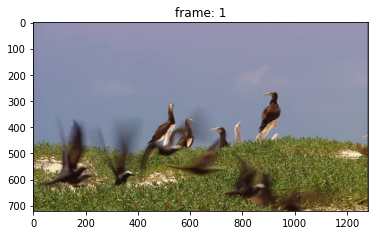

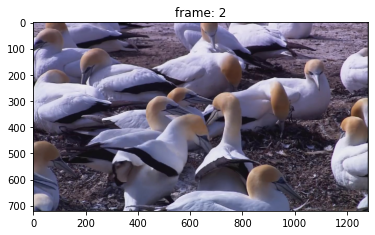

In [63]:
i = 1

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

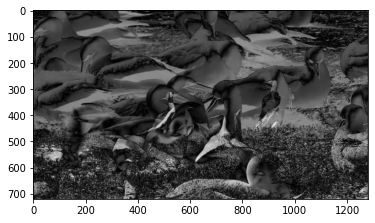

In [64]:
# convert the frames to grayscale
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

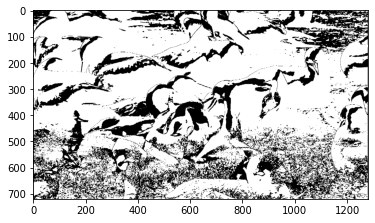

In [65]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

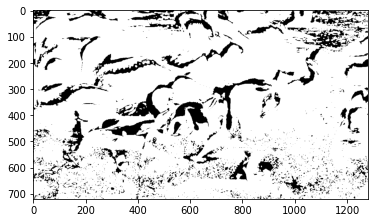

In [66]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

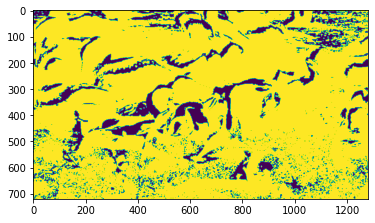

In [67]:
plt.imshow(dilated)
plt.show()

In [68]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

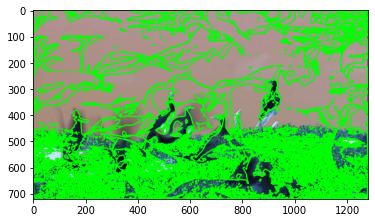

In [69]:
dmy = col_images[1].copy()

cv2.drawContours(dmy, contours, -1, (0, 255, 0), 3)
plt.imshow(dmy)
plt.show()

In [72]:
try: 
    # creating a folder to store the frames 
    if not os.path.exists('/content/images/saved'): 
        os.makedirs('/content/images/saved') 

# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data')

In [80]:
pathIn='/content/images/saved'

In [74]:
os.chdir('/content/images')  
path ='/content/images'
 
for file in os.listdir('.'):
  if file.endswith(".jpg"): 
        image = load_img(file, target_size=(224, 224))
        image = img_to_array(image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        pop = model.predict(image)
        label = decode_predictions(pop)
        label = label[0][0]
        #if label[2]*100>80:
          #print('%s (%.2f%%)' % (label[1], label[2]*100))
          #print(image)

In [81]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = ('%s (%.2f%%)' % (label[1], label[2]*100))
org = (50, 50)
fontScale = 1
color = (255, 0, 0)
thickness = 2
   
cv2.putText(dmy,text,org,font,fontScale,color,thickness,cv2.LINE_AA)
cv2.imwrite(pathIn + str(i) + '.jpg',dmy)  

True

In [100]:
pathOut = 'obj_det.mp4'
fps = 14

In [83]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [97]:
for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    frame_array.append(img)

In [102]:
#inserting the frames into an image array
height, width, layers = img.shape
size = (width,height)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps,size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()